In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('SBA_Loan_Data.csv')
data.head()

,Unnamed: 0,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92,Approve
0,0,84,2.0,60000,48000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,60,2.0,40000,32000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,180,1.0,287000,215250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,5,120,1.0,517000,387750,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,7,84,2.0,45000,36000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [4]:
target = data.Approve

In [5]:
data.drop(['Approve','Unnamed: 0'], axis=1, inplace=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=101)

In [7]:
X_train.head(3)

,Term,NewExist,GrAppv,SBA_Appv,RevLineCr,LowDoc,NAICS_11,NAICS_21,NAICS_22,NAICS_23,NAICS_31-33,NAICS_42,NAICS_44-45,NAICS_48-49,NAICS_51,NAICS_52,NAICS_53,NAICS_54,NAICS_55,NAICS_56,NAICS_61,NAICS_62,NAICS_71,NAICS_72,NAICS_81,NAICS_92
58347,44,2.0,18700,9350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
426166,48,2.0,30000,27000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
312301,72,1.0,150000,127500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
y_train.head(2)

58347     1
426166    1
Name: Approve, dtype: int64

In [9]:
logreg = LogisticRegression()

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
logreg_pred = logreg.predict(X_test)
logreg_proba = logreg.predict_proba(X_test)

In [14]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.59      0.27      0.37     19783
           1       0.83      0.95      0.88     72077

    accuracy                           0.80     91860
   macro avg       0.71      0.61      0.63     91860
weighted avg       0.78      0.80      0.77     91860



In [16]:
tnlogreg, fplogreg, fnlogreg, tplogreg = confusion_matrix(y_test, logreg_pred).ravel()
print(confusion_matrix(y_test, logreg_pred))

[[ 5420 14363]
 [ 3732 68345]]


In [17]:
dtc = DecisionTreeClassifier()

In [18]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=20)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=20)

In [19]:
dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)

In [20]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.93     91860
   macro avg       0.90      0.90      0.90     91860
weighted avg       0.93      0.93      0.93     91860



In [21]:
tndtc, fpdtc, fndtc, tpdtc = confusion_matrix(y_test, dtc_pred).ravel()
print(confusion_matrix(y_test, dtc_pred))

[[16600  3183]
 [ 3143 68934]]


In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc = RandomForestClassifier(bootstrap=True, criterion='gini',max_depth=20,min_samples_split=10, n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [24]:
rfc_pred = rfc.predict(X_test)
rfc_proba = rfc.predict_proba(X_test)

In [25]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     19783
           1       0.95      0.95      0.95     72077

    accuracy                           0.92     91860
   macro avg       0.89      0.89      0.89     91860
weighted avg       0.92      0.92      0.92     91860



In [26]:
tnrfc, fprfc, fnrfc, tprfc = confusion_matrix(y_test, rfc_pred).ravel()
print(confusion_matrix(y_test, rfc_pred))

[[16192  3591]
 [ 3446 68631]]


In [27]:
abc = AdaBoostClassifier()

In [28]:
abc = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [29]:
abc_pred = abc.predict(X_test)
abc_proba = abc.predict_proba(X_test)

In [30]:
print(classification_report(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78     19783
           1       0.94      0.94      0.94     72077

    accuracy                           0.91     91860
   macro avg       0.86      0.86      0.86     91860
weighted avg       0.91      0.91      0.91     91860



In [31]:
tnabc, fpabc, fnabc, tpabc = confusion_matrix(y_test, abc_pred).ravel()
print(confusion_matrix(y_test, abc_pred))

[[15593  4190]
 [ 4409 67668]]


In [32]:
gbc = GradientBoostingClassifier()

In [33]:
gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=10, min_samples_split=5 ,n_estimators=100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, min_samples_split=5)

In [34]:
gbc_pred = gbc.predict(X_test)
gbc_proba = gbc.predict_proba(X_test)

In [35]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     19783
           1       0.96      0.96      0.96     72077

    accuracy                           0.94     91860
   macro avg       0.91      0.90      0.91     91860
weighted avg       0.94      0.94      0.94     91860



In [36]:
tngbc, fpgbc, fngbc, tpgbc = confusion_matrix(y_test, gbc_pred).ravel()
print(confusion_matrix(y_test, gbc_pred))

[[16748  3035]
 [ 2773 69304]]


In [37]:
logreg_prob = logreg.predict_proba(X_test)
problogreg = logreg_prob[:,1]
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test, problogreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

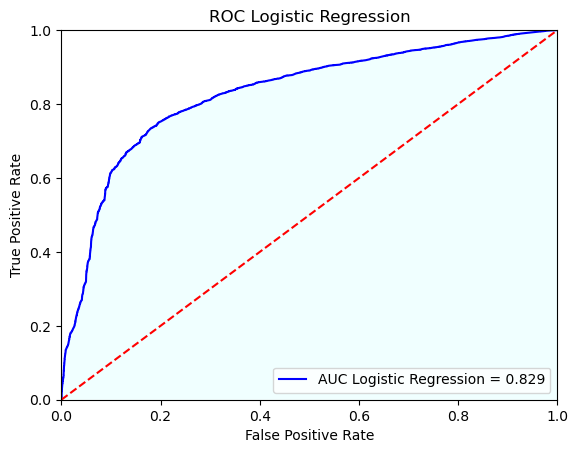

In [38]:
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'blue', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [39]:
dtc_prob = dtc.predict_proba(X_test)
probdtc = dtc_prob[:,1]
fpr_dtc, tpr_dtc, threshold_dtc = roc_curve(y_test, probdtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)

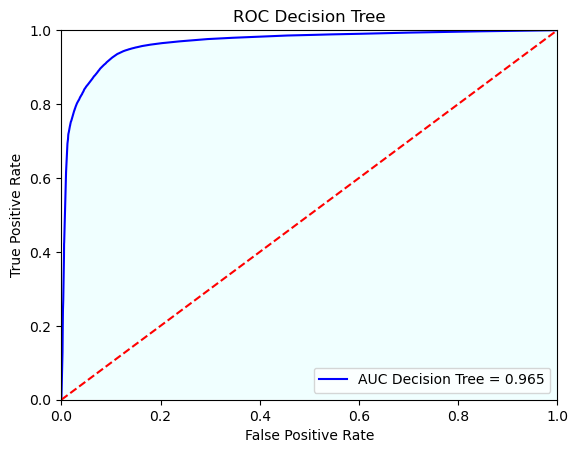

In [40]:
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [41]:
rfc_prob = rfc.predict_proba(X_test)
probrfc = rfc_prob[:,1]
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve(y_test, probrfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

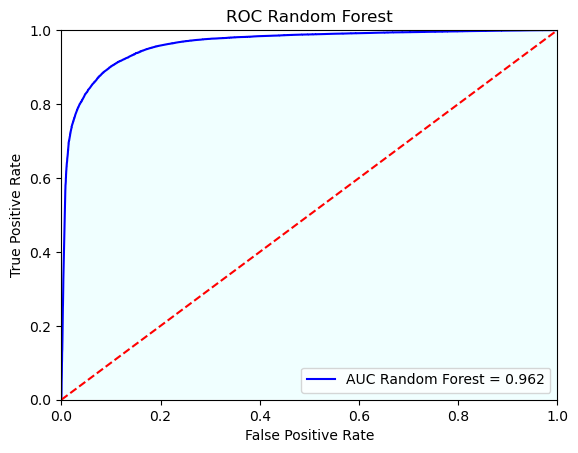

In [42]:
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'blue', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [43]:
abc_prob = abc.predict_proba(X_test)
probabc = abc_prob[:,1]
fpr_abc, tpr_abc, threshold_abc = roc_curve(y_test, probabc)
roc_auc_abc = auc(fpr_abc, tpr_abc)

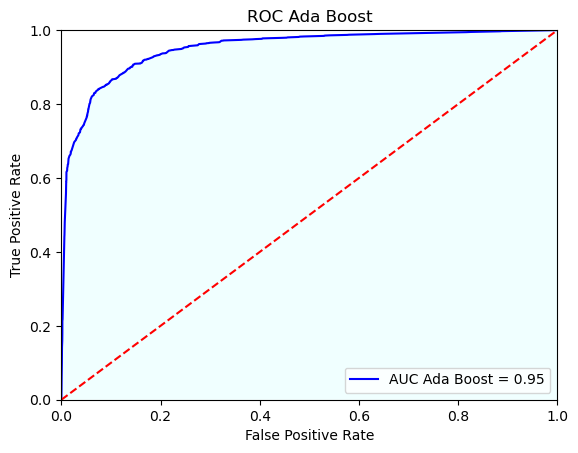

In [44]:
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [45]:
gbc_prob = gbc.predict_proba(X_test)
probgbc = gbc_prob[:,1]
fpr_gbc, tpr_gbc, threshold_gbc = roc_curve(y_test, probgbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

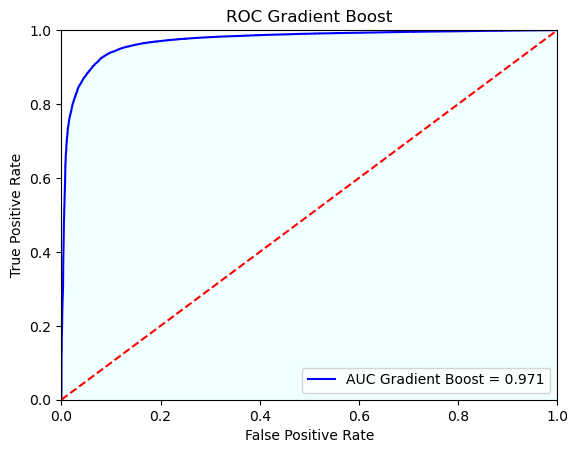

In [46]:
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'blue', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

In [47]:
modelComparation = pd.DataFrame({
    "Logistic Regression": [accuracy_score(y_test, logreg_pred),precision_score(y_test, logreg_pred),recall_score(y_test, logreg_pred),f1_score(y_test, logreg_pred), tplogreg, tnlogreg, fplogreg, fnlogreg],
    "Decision Tree": [accuracy_score(y_test, dtc_pred),precision_score(y_test, dtc_pred),recall_score(y_test, dtc_pred),f1_score(y_test, dtc_pred), tpdtc, tndtc, fpdtc, fndtc],
    "Random Forest": [accuracy_score(y_test, rfc_pred),precision_score(y_test, rfc_pred),recall_score(y_test, rfc_pred),f1_score(y_test, rfc_pred), tprfc, tnrfc, fprfc, fnrfc],
    "Ada Boost": [accuracy_score(y_test, abc_pred),precision_score(y_test, abc_pred),recall_score(y_test, abc_pred),f1_score(y_test, abc_pred), tpabc, tnabc, fpabc, fnabc],
    "Gradient Boost": [accuracy_score(y_test, gbc_pred),precision_score(y_test, gbc_pred),recall_score(y_test, gbc_pred),f1_score(y_test, gbc_pred), tpgbc, tngbc, fpgbc, fngbc],
}, index=['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'True Positive', 'True Negative', 'False Positive', 'False Negative'])
modelComparation

,Logistic Regression,Decision Tree,Random Forest,Ada Boost,Gradient Boost
Accuracy Score,0.803015,0.931134,0.923394,0.906390,0.936773
Precision Score,0.826341,0.955863,0.950278,0.941691,0.958045
Recall Score,0.948222,0.956394,0.952190,0.938829,0.961527
F1 Score,0.883096,0.956129,0.951233,0.940258,0.959783
True Positive,68345.000000,68934.000000,68631.000000,67668.000000,69304.000000
True Negative,5420.000000,16600.000000,16192.000000,15593.000000,16748.000000
False Positive,14363.000000,3183.000000,3591.000000,4190.000000,3035.000000
False Negative,3732.000000,3143.000000,3446.000000,4409.000000,2773.000000


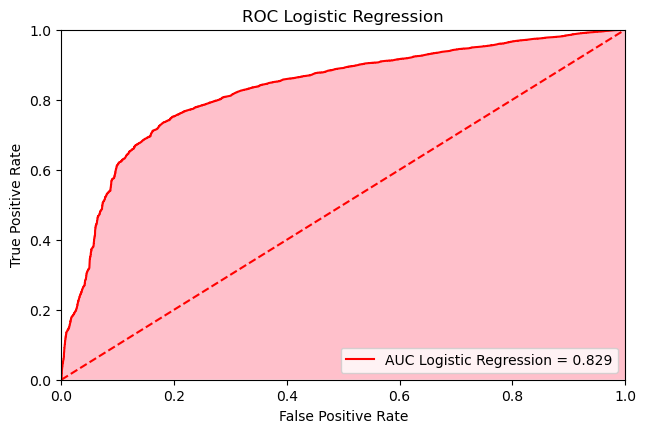

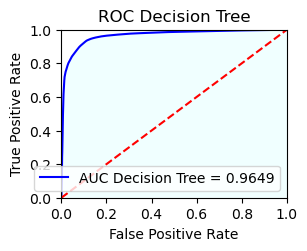

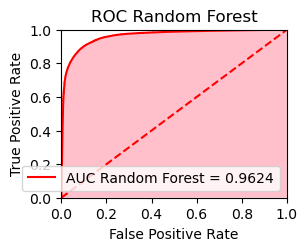

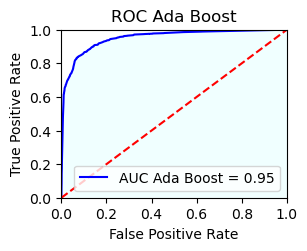

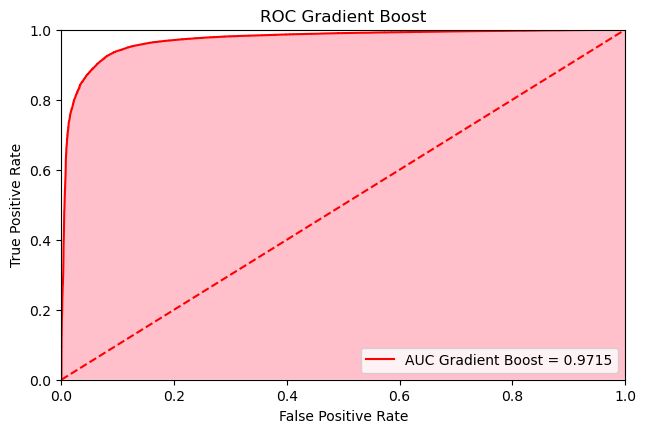

In [48]:
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Logistic Regression')
plt.plot(fpr_logreg, tpr_logreg, 'red', label='AUC Logistic Regression = {}'.format(round(roc_auc_logreg,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_logreg, tpr_logreg, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')
plt.show()

plt.subplot(222)
plt.title('ROC Decision Tree')
plt.plot(fpr_dtc, tpr_dtc, 'blue', label='AUC Decision Tree = {}'.format(round(roc_auc_dtc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_dtc, tpr_dtc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

plt.subplot(223)
plt.title('ROC Random Forest')
plt.plot(fpr_rfc, tpr_rfc, 'red', label='AUC Random Forest = {}'.format(round(roc_auc_rfc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_rfc, tpr_rfc, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')
plt.show()

plt.subplot(224)
plt.title('ROC Ada Boost')
plt.plot(fpr_abc, tpr_abc, 'blue', label='AUC Ada Boost = {}'.format(round(roc_auc_abc,3)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_abc, tpr_abc, 0, facecolor='azure', alpha=1)
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.title('ROC Gradient Boost')
plt.plot(fpr_gbc, tpr_gbc, 'red', label='AUC Gradient Boost = {}'.format(round(roc_auc_gbc,4)))
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_gbc, tpr_gbc, 0, facecolor='pink', alpha=1)
plt.legend(loc='lower right')
plt.show()